# machine learning- K_Means

In [25]:
# import modules
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd

In [26]:
%matplotlib inline

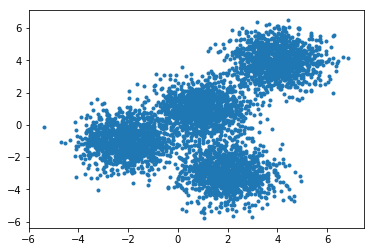

In [27]:
# generate source data
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:,0],X[:,1],marker='.')

In [28]:
# set up K means,
# n_clusters: how clusters to form
# n_int: Number of time the k-means algorithm will be run
k_means=KMeans(n_clusters=4,n_init=12)
k_means.fit(X)
k_means_labels=k_means.labels_
k_means_cluster_centers=k_means.cluster_centers_

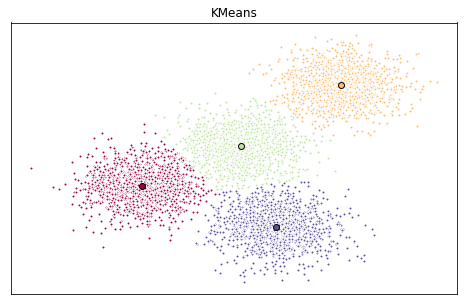

In [29]:
# plot the data
fig=plt.figure(figsize=(8,5))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax=fig.add_subplot(1,1,1)
for k,col in zip(range(0,4),colors):
    my_members=(k_means_labels==k)
    cluster_center=k_means_cluster_centers[k]
    # select for the points belonging to cluster K
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')
# Remove x-axis ticks
ax.set_xticks(())
# Remove y-axis ticks
ax.set_yticks(())
# Show the plot
plt.show()

In [30]:
# use the real  data
df=pd.read_csv('Cust_Segmentation.csv')

In [31]:
# address is not used 
df.drop('Address',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X) # replace nan with zero
Clus_dataSet = StandardScaler().fit_transform(X)

In [ ]:
# K mean modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels) # take a look at the labes
df['Clus_km']=labels
df.groupby('Clus_km').mean()

Text(0, 0.5, 'Income')

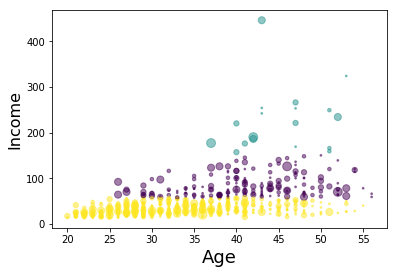

In [16]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

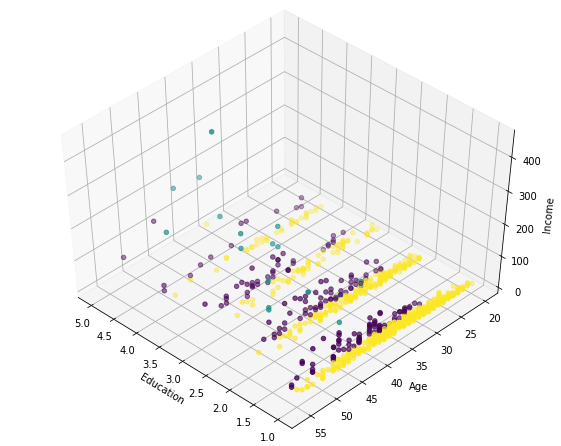

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
# plot the figure in 3-D
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))